## Adidas US Sales

In [1]:
# Suppress Warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Libraries for Data Analysis

import numpy as np
import pandas as pd

In [3]:
# Libraries for Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Dataset

df = pd.read_csv("adidas.csv")

In [5]:
df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [6]:
df.shape

(9648, 14)

In [7]:
print("Total Rows :", df.shape[0])
print("Total Columns :", df.shape[1])

Total Rows : 9648
Total Columns : 14


In [8]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9648 non-null   int64  
 1   Retailer          9648 non-null   object 
 2   Retailer ID       9648 non-null   int64  
 3   Invoice Date      9648 non-null   object 
 4   Region            9648 non-null   object 
 5   State             9648 non-null   object 
 6   City              9648 non-null   object 
 7   Product           9648 non-null   object 
 8   Price per Unit    9648 non-null   float64
 9   Units Sold        9648 non-null   int64  
 10  Total Sales       9648 non-null   float64
 11  Operating Profit  9648 non-null   float64
 12  Operating Margin  9648 non-null   float64
 13  Sales Method      9648 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 1.0+ MB


In [9]:
df.columns

Index(['Unnamed: 0', 'Retailer', 'Retailer ID', 'Invoice Date', 'Region',
       'State', 'City', 'Product', 'Price per Unit', 'Units Sold',
       'Total Sales', 'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [10]:
# Remove leading/trailing spaces from column names

df.columns = df.columns.str.strip()  

In [11]:
# Descriptive statistics

df.describe()

,Unnamed: 0,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648.000000,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,4823.500000,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2785.282032,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,0.000000,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,2411.750000,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,4823.500000,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,7235.250000,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,9647.000000,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [12]:
# Check for null value

df.isnull().sum()

Unnamed: 0          0
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [13]:
# Drop Unwanted column

df = df.drop(['Unnamed: 0'], axis=1)

In [14]:
# Change Date Format

df['Invoice Date'] = pd.to_datetime(df["Invoice Date"], errors='coerce')

df['Day'] = df['Invoice Date'].dt.day_name()

df['Month'] = df['Invoice Date'].dt.month_name()

df['Year'] = df['Invoice Date'].dt.year

In [15]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Day,Month,Year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,Wednesday,January,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,Thursday,January,2020
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,Friday,January,2020
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,Saturday,January,2020
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,Sunday,January,2020


------------

### Now, Data is ready to answer this :

Q) : What are the top months having maximum sales?
    
Q) : When are sales more on weekdays or weekends?
   
Q) : Which are the top selling products for Adidas? Which are the most profitable products?

Q) : What is the correlation between various variables of the dataset?
    
Q) : What is the citywise profit percent?
    
Q) : What is the market share of each retailer?
    
Q) : Which are the top Retailers with respect to regionwise sales?
    
Q) : What is the top sales mode?

---------------

### What are the top months having maximum sales?

In [16]:
df["Year"].unique()

array([2020, 2021], dtype=int64)

In [17]:
print("\nTop Month with Maximum Sales :")
df.groupby(["Month"])[["Total Sales"]].sum().sort_values("Total Sales", ascending=False).head()


Top Month with Maximum Sales :


,Total Sales
Month,
July,95480694.0
August,92166201.0
December,85841957.0
May,80507695.0
September,77661459.0


In [18]:
print("\nTop Month with Maximum Sales for each year:")

df.groupby(["Year", "Month"])[["Total Sales"]].sum().sort_values("Total Sales", ascending=False).groupby(level=0).head(5)


Top Month with Maximum Sales for each year:


Total Sales
Year Month                 
2021 July        78334681.0
     December    77815430.0
     August      72288221.0
     June        65917553.0
     May         63589681.0
2020 April       24607006.0
     August      19877980.0
     September   18304436.0
     March       17660577.0
     July        17146013.0

### When are sales more on weekdays or weekends?

In [19]:
df['Day'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [20]:
df_Weekends = df[(df['Day'] == "Sunday") | (df['Day'] == "Saturday")]

df_Weekdays = df[(df['Day'] != "Sunday") & (df['Day'] != "Saturday")]

In [21]:
weekday_sales = df_Weekdays["Total Sales"].sum()

In [22]:
weekend_sales = df_Weekends["Total Sales"].sum()

In [23]:
print('Weekdays Sales: ',weekday_sales)
print('Weekends Sales: ',weekend_sales)

if weekday_sales > weekday_sales:
    print("\nSales are generally higher on Weekdays.")
else:
    print("\nSales are generally higher on Weekends.")

Weekdays Sales:  661954158.0
Weekends Sales:  237947967.0

Sales are generally higher on Weekends.


### Which are the top selling products for Adidas? Which are the most profitable products?

In [24]:
print("\nTop Selling Products: ")

df.groupby(['Product'])[['Total Sales']].sum().sort_values("Total Sales", ascending=False)


Top Selling Products: 


,Total Sales
Product,
Men's Street Footwear,208826244.0
Women's Apparel,179038860.0
Men's Athletic Footwear,153673680.0
Women's Street Footwear,128002813.0
Men's Apparel,123728632.0
Women's Athletic Footwear,106631896.0


In [25]:
print("\nTop Profitable Products: ")

df.groupby(['Product'])[['Operating Profit']].sum().sort_values("Operating Profit", ascending=False)


Top Profitable Products: 


,Operating Profit
Product,
Men's Street Footwear,82802260.62
Women's Apparel,68650970.56
Men's Athletic Footwear,51846888.19
Women's Street Footwear,45095826.81
Men's Apparel,44763030.33
Women's Athletic Footwear,38975784.94


### What is the correlation between various variables of the dataset?

In [26]:
df.select_dtypes(include='number').columns.tolist()

['Retailer ID',
 'Price per Unit',
 'Units Sold',
 'Total Sales',
 'Operating Profit',
 'Operating Margin',
 'Year']

In [27]:
num_col = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']

In [28]:
df[num_col].corr()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
Price per Unit,1.000000,0.265869,0.435811,0.394546,-0.137486
Units Sold,0.265869,1.000000,0.913431,0.892379,-0.305479
Total Sales,0.435811,0.913431,1.000000,0.956307,-0.364592
Operating Profit,0.394546,0.892379,0.956307,1.000000,-0.211920
Operating Margin,-0.137486,-0.305479,-0.364592,-0.211920,1.000000


<Axes: >

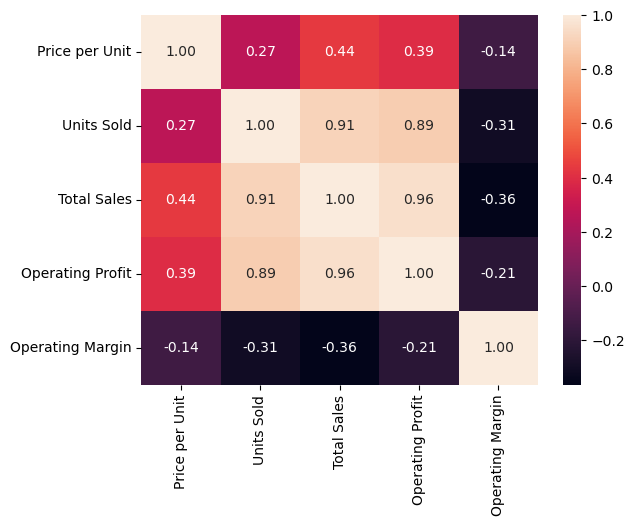

In [56]:
sns.heatmap(df[num_col].corr(), annot=True, fmt='.2f')

### What is the citywise profit percent?


In [59]:
City_profit = df.groupby('City')[['Total Sales', 'Operating Profit']].sum()

# Calculate profit percent for each city
City_profit['Profit Percent'] = round((City_profit["Operating Profit"]/City_profit["Total Sales"]*100),2)

# Display the results
print("\nCitywise Profit Percent:")
print(City_profit['Profit Percent'].sort_values(ascending=False))


Citywise Profit Percent:
City
Birmingham        51.88
Knoxville         47.01
Detroit           43.68
Dallas            42.31
Boise             42.13
Omaha             41.14
Jackson           40.85
Charlotte         40.73
Columbus          40.73
St. Louis         40.35
Burlington        40.31
Philadelphia      40.13
Chicago           40.01
Salt Lake City    39.95
Billings          39.67
New Orleans       39.65
Louisville        39.07
Charleston        39.04
Little Rock       38.89
Houston           38.67
Oklahoma City     38.67
Albany            38.60
Miami             38.51
Indianapolis      38.24
Newark            36.81
Wilmington        36.79
Denver            36.74
Atlanta           36.29
Milwaukee         36.25
Minneapolis       36.19
Providence        36.06
Hartford          35.88
Richmond          35.78
Des Moines        35.77
Baltimore         35.55
Los Angeles       35.28
Manchester        35.26
Cheyenne          35.23
Portland          35.23
Wichita           35.20
New York 

### What is the market share of each retailer?

In [31]:
df.groupby('Retailer')['Total Sales'].sum()

Retailer
Amazon            77698912.0
Foot Locker      220094720.0
Kohl's           102114753.0
Sports Direct    182470997.0
Walmart           74558410.0
West Gear        242964333.0
Name: Total Sales, dtype: float64

In [32]:
retailer_sales = df.groupby('Retailer')['Total Sales'].sum()

total_sales = retailer_sales.sum()

# Calculate market share for each retailer
retailer_sales['Market Share'] = (retailer_sales / total_sales) * 100

print("\nMarket Share of Each Retailer:")
retailer_sales['Market Share']


Market Share of Each Retailer:


Retailer
Amazon            8.634151
Foot Locker      24.457629
Kohl's           11.347318
Sports Direct    20.276760
Walmart           8.285169
West Gear        26.998973
Name: Total Sales, dtype: float64

### Which are the top Retailers with respect to regionwise sales?

In [33]:
df.groupby(["Region", "Retailer"])[["Total Sales"]].sum()

Total Sales
Region    Retailer                  
Midwest   Amazon          16835873.0
          Foot Locker     47987394.0
          Kohl's          22229415.0
          Sports Direct   26207191.0
          West Gear       22540586.0
Northeast Amazon          36262590.0
          Foot Locker     65326474.0
          Kohl's          14031168.0
          Sports Direct   24698097.0
          Walmart         13712005.0
          West Gear       32293733.0
South     Amazon            409091.0
          Foot Locker      9307025.0
          Kohl's           3552055.0
          Sports Direct   65258121.0
          Walmart         33049858.0
          West Gear       33087031.0
Southeast Amazon          10826333.0
          Foot Locker     59669118.0
          Sports Direct   54178543.0
          Walmart         21005539.0
          West Gear       17491703.0
West      Amazon          13365025.0
          Foot Locker     37804709.0
          Kohl's          62302115.0
          Sports Direct   12129045.0
          Walmart          6791008.0
          West Gear      137551280.0

In [34]:
df.groupby(["Region", "Retailer"])[["Total Sales"]].sum().sort_values("Total Sales", ascending=False).groupby(level=0).head(1)

,,Total Sales
Region,Retailer,
West,West Gear,137551280.0
Northeast,Foot Locker,65326474.0
South,Sports Direct,65258121.0
Southeast,Foot Locker,59669118.0
Midwest,Foot Locker,47987394.0


In [60]:
region_retailer_sales = df.groupby(['Region', 'Retailer'])['Total Sales'].sum()

# Reset index so it can work like a DataFrame
region_retailer_sales = region_retailer_sales.reset_index()

# Now find the top retailer in each region
top_retailers = region_retailer_sales.loc[region_retailer_sales.groupby('Region')['Total Sales'].idxmax()]

top_retailers

,Region,Retailer,Total Sales
1,Midwest,Foot Locker,47987394.0
6,Northeast,Foot Locker,65326474.0
14,South,Sports Direct,65258121.0
18,Southeast,Foot Locker,59669118.0
27,West,West Gear,137551280.0


In [35]:
df.groupby(["Region", "Retailer"])[["Total Sales"]].sum().groupby('Region').idxmax()

,Total Sales
Region,
Midwest,"(Midwest, Foot Locker)"
Northeast,"(Northeast, Foot Locker)"
South,"(South, Sports Direct)"
Southeast,"(Southeast, Foot Locker)"
West,"(West, West Gear)"


### What is the top sales mode?

In [62]:
df.groupby('Sales Method')[['Total Sales']].sum()

,Total Sales
Sales Method,
In-store,356643750.0
Online,247672882.0
Outlet,295585493.0


In [44]:
sales_method_sales = df.groupby('Sales Method')['Total Sales'].sum()

# Get the sales method with the highest sales
top_sales_method = sales_method_sales.idxmax()

# Display the result
print("\nTop Sales Mode:")
print(top_sales_method)


Top Sales Mode:
In-store


In [55]:
df.groupby('Month')[['Total Sales']].sum().reset_index()

,Month,Total Sales
0,April,72339970.0
1,August,92166201.0
2,December,85841957.0
3,February,61100153.0
4,January,71479142.0
5,July,95480694.0
6,June,74747372.0
7,March,56809109.0
8,May,80507695.0
9,November,67857340.0
